In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import DataFrame,Series,datetime
%matplotlib inline

## 原始数据->时间序列数据

In [2]:
values = [datetime(2001,1,1),
         datetime(2001,2,1),
         datetime(2001,3,1)]
s = Series(np.arange(3), index=values)
s

2001-01-01    0
2001-02-01    1
2001-03-01    2
dtype: int64

In [3]:
df = pd.DataFrame({'商品A':[25,27,30],
                  '商品B':[10,15,17]},index=values)
df

,商品A,商品B
2001-01-01,25,10
2001-02-01,27,15
2001-03-01,30,17


In [4]:
df.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01'], dtype='datetime64[ns]', freq=None)

In [5]:
df['商品A']

2001-01-01    25
2001-02-01    27
2001-03-01    30
Name: 商品A, dtype: int64

In [6]:
pd.date_range('2001-01-01',freq='M',periods=3)

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31'], dtype='datetime64[ns]', freq='M')

In [7]:
s = Series(np.arange(3))
s

0    0
1    1
2    2
dtype: int64

In [8]:
s.index = pd.date_range('2001-01-01',freq='M',periods=3)
s

2001-01-31    0
2001-02-28    1
2001-03-31    2
Freq: M, dtype: int64

freq属性种类：
A 年末
M 月末
W 周
D 日
H 时
T 分
S 秒
其他：25种类

In [9]:
s.index = pd.date_range('2001-01-01',freq='MS',periods=3) #MS月初
s

2001-01-01    0
2001-02-01    1
2001-03-01    2
Freq: MS, dtype: int64

In [10]:
s.index = pd.date_range('2001-01-01',freq='W',periods=3) #W周
s

2001-01-07    0
2001-01-14    1
2001-01-21    2
Freq: W-SUN, dtype: int64

In [11]:
s.index = pd.date_range('2001-01-01',freq='W-TUE',periods=3) #显示每周四的日期
s

2001-01-02    0
2001-01-09    1
2001-01-16    2
Freq: W-TUE, dtype: int64

## 字符串与时间序列转换

In [12]:
pd.to_datetime(['2016-09-22','2016-09-23'])

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

In [13]:
pd.to_datetime(['September 22nd,2016','September 23nd,2016'])

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

In [14]:
pd.to_datetime(['22 Sep 2016','23 Sep 2016'])

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

In [15]:
pd.to_datetime(['2016年9月22日','2016年9月23日'],format='%Y年%m月%d日')
#对于非默认时间格式需要用format属性标记

DatetimeIndex(['2016-09-22', '2016-09-23'], dtype='datetime64[ns]', freq=None)

## 日期切片、选择

In [16]:
idx = pd.date_range('2016-01-01',freq='D',periods=366)
df = DataFrame({
    '商品A': np.random.randint(100,size=366),
    '商品B': np.random.randint(100,size=366)
},index=idx)
df[:5]

,商品A,商品B
2016-01-01,71,25
2016-01-02,76,88
2016-01-03,81,55
2016-01-04,78,44
2016-01-05,39,96


In [17]:
df.loc[datetime(2016,1,2)]

商品A    76
商品B    88
Name: 2016-01-02 00:00:00, dtype: int64

In [18]:
df.loc['2016-01-03']

商品A    81
商品B    55
Name: 2016-01-03 00:00:00, dtype: int64

In [19]:
df.loc['2016-09-22':]

,商品A,商品B
2016-09-22,70,50
2016-09-23,96,7
2016-09-24,75,21
2016-09-25,2,38
2016-09-26,35,27
2016-09-27,23,56
2016-09-28,21,34
2016-09-29,7,37
2016-09-30,51,85
2016-10-01,26,27


In [20]:
df.loc['2016-09-01':'2016-09-30':2]
#9月1日到9月30日每隔1天的数据

,商品A,商品B
2016-09-01,52,66
2016-09-03,4,32
2016-09-05,50,89
2016-09-07,10,68
2016-09-09,13,18
2016-09-11,98,55
2016-09-13,10,67
2016-09-15,35,36
2016-09-17,7,19
2016-09-19,41,41


In [21]:
df.loc['2016-03'] #3月份的数据

,商品A,商品B
2016-03-01,35,29
2016-03-02,24,10
2016-03-03,41,84
2016-03-04,45,54
2016-03-05,35,92
2016-03-06,58,37
2016-03-07,55,82
2016-03-08,71,89
2016-03-09,57,18
2016-03-10,84,49


In [22]:
df['2016-03':'2016-05']#3月到5月的数据

,商品A,商品B
2016-03-01,35,29
2016-03-02,24,10
2016-03-03,41,84
2016-03-04,45,54
2016-03-05,35,92
2016-03-06,58,37
2016-03-07,55,82
2016-03-08,71,89
2016-03-09,57,18
2016-03-10,84,49


In [23]:
df.index.month

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [24]:
(df.index.month == 1) | (df.index.month == 3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [25]:
df.loc[(df.index.month == 1) | (df.index.month == 3)]#使用布尔变量来选择对应日期数据

,商品A,商品B
2016-01-01,71,25
2016-01-02,76,88
2016-01-03,81,55
2016-01-04,78,44
2016-01-05,39,96
2016-01-06,12,77
2016-01-07,83,29
2016-01-08,11,94
2016-01-09,61,84
2016-01-10,64,2


### 时间序列数据的属性：
1. year 年
2. month 月
3. day 日
4. hour 时
5. minute 分
6. second 秒
7. microsecond 毫秒
8. nanosecond 纳秒

## 时间序列数据的处理
1. 时间周期的转换
2. 缺损值的补充
3. 前后值的比较与计算

In [26]:
idx = pd.date_range('2016-09-22',freq='H',periods=50)
df = DataFrame({
    'val': np.random.randn(50)
},index=idx)
df = df.cumsum()
df

,val
2016-09-22 00:00:00,1.559468
2016-09-22 01:00:00,1.255970
2016-09-22 02:00:00,1.159050
2016-09-22 03:00:00,1.754808
2016-09-22 04:00:00,1.733220
2016-09-22 05:00:00,1.201252
2016-09-22 06:00:00,2.209835
2016-09-22 07:00:00,1.201960
2016-09-22 08:00:00,1.844851
2016-09-22 09:00:00,3.472908


In [27]:
df.resample('6H').mean() #以6小时为单位成组

,val
2016-09-22 00:00:00,1.443961
2016-09-22 06:00:00,2.985020
2016-09-22 12:00:00,4.936734
2016-09-22 18:00:00,4.587012
2016-09-23 00:00:00,5.212124
2016-09-23 06:00:00,5.557640
2016-09-23 12:00:00,2.820872
2016-09-23 18:00:00,4.152423
2016-09-24 00:00:00,5.893819


In [28]:
df.resample('30T').interpolate() #以三十分钟为单位成组

,val
2016-09-22 00:00:00,1.559468
2016-09-22 00:30:00,1.407719
2016-09-22 01:00:00,1.255970
2016-09-22 01:30:00,1.207510
2016-09-22 02:00:00,1.159050
2016-09-22 02:30:00,1.456929
2016-09-22 03:00:00,1.754808
2016-09-22 03:30:00,1.744014
2016-09-22 04:00:00,1.733220
2016-09-22 04:30:00,1.467236


### 组合对象的计算方式种类：
1. ill
2. backfill
3. pad
4. fillna
5. interpolate
6. count
7. nunique
8. first
9. last
10. max
11. median
12. min
13. ohlc
14. prod
15. size
16. sem
17. std
18. sum
19. var

In [29]:
indexer = np.random.randint(4,size=50) == 1
df.loc[indexer] = np.nan
df

,val
2016-09-22 00:00:00,1.559468
2016-09-22 01:00:00,1.255970
2016-09-22 02:00:00,1.159050
2016-09-22 03:00:00,1.754808
2016-09-22 04:00:00,1.733220
2016-09-22 05:00:00,1.201252
2016-09-22 06:00:00,2.209835
2016-09-22 07:00:00,1.201960
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,3.472908


In [30]:
df.rolling(3).mean()

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,NaN
2016-09-22 02:00:00,1.324829
2016-09-22 03:00:00,1.389943
2016-09-22 04:00:00,1.549026
2016-09-22 05:00:00,1.563093
2016-09-22 06:00:00,1.714769
2016-09-22 07:00:00,1.537682
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,NaN


In [31]:
df.shift(periods=1)#将数据前移一个时间序列单位

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,1.559468
2016-09-22 02:00:00,1.255970
2016-09-22 03:00:00,1.159050
2016-09-22 04:00:00,1.754808
2016-09-22 05:00:00,1.733220
2016-09-22 06:00:00,1.201252
2016-09-22 07:00:00,2.209835
2016-09-22 08:00:00,1.201960
2016-09-22 09:00:00,NaN


In [32]:
df - df.shift() #计算前后时间单位差值

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,-0.303498
2016-09-22 02:00:00,-0.096919
2016-09-22 03:00:00,0.595758
2016-09-22 04:00:00,-0.021588
2016-09-22 05:00:00,-0.531969
2016-09-22 06:00:00,1.008583
2016-09-22 07:00:00,-1.007875
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,NaN


In [33]:
df.diff(periods=1) #计算前后时间单位差值

,val
2016-09-22 00:00:00,NaN
2016-09-22 01:00:00,-0.303498
2016-09-22 02:00:00,-0.096919
2016-09-22 03:00:00,0.595758
2016-09-22 04:00:00,-0.021588
2016-09-22 05:00:00,-0.531969
2016-09-22 06:00:00,1.008583
2016-09-22 07:00:00,-1.007875
2016-09-22 08:00:00,NaN
2016-09-22 09:00:00,NaN


In [34]:
idx = pd.date_range('2016-09-22 10:00',freq='T',periods=50)
df = DataFrame({
    'val':np.repeat([0,1,0,1],[10,20,10,10])
},index=idx)
df

,val
2016-09-22 10:00:00,0
2016-09-22 10:01:00,0
2016-09-22 10:02:00,0
2016-09-22 10:03:00,0
2016-09-22 10:04:00,0
2016-09-22 10:05:00,0
2016-09-22 10:06:00,0
2016-09-22 10:07:00,0
2016-09-22 10:08:00,0
2016-09-22 10:09:00,0


In [35]:
df.index[df['val'] != df['val'].shift()]

DatetimeIndex(['2016-09-22 10:00:00', '2016-09-22 10:10:00',
               '2016-09-22 10:30:00', '2016-09-22 10:40:00'],
              dtype='datetime64[ns]', freq=None)

In [36]:
idx = pd.date_range('2016-09-01',freq='D',periods=60)
df = DataFrame({
    '数量':np.random.randint(1000),
    '商品名':np.random.choice(list('ABC'),1000),
    '发货日':np.random.choice(idx,1000)
})
df

,发货日,商品名,数量
0,2016-10-05,B,905
1,2016-10-30,A,905
2,2016-09-22,C,905
3,2016-09-23,C,905
4,2016-10-22,C,905
5,2016-09-13,B,905
6,2016-09-14,C,905
7,2016-10-11,C,905
8,2016-09-28,A,905
9,2016-10-22,C,905


### pd.Grouper 组合数据

In [37]:
df.groupby([pd.Grouper(key='发货日',freq='M'),'商品名']).sum()

数量
发货日        商品名        
2016-09-30 A    149325
           B    142990
           C    159280
2016-10-31 A    138465
           B    161090
           C    153850

## 返回周几 dt.weekday

In [38]:
df['发货日'].dt.weekday

0      2
1      6
2      3
3      4
4      5
5      1
6      2
7      1
8      2
9      5
10     5
11     5
12     2
13     4
14     5
15     5
16     2
17     4
18     6
19     6
20     5
21     3
22     4
23     6
24     3
25     4
26     6
27     0
28     6
29     3
      ..
970    5
971    6
972    3
973    6
974    4
975    1
976    2
977    3
978    1
979    2
980    5
981    3
982    2
983    3
984    0
985    3
986    6
987    3
988    5
989    0
990    1
991    4
992    6
993    2
994    3
995    5
996    3
997    3
998    1
999    2
Name: 发货日, dtype: int64

In [40]:
df.groupby(df['发货日'].dt.weekday).sum()

,数量
发货日,
0,123080
1,113125
2,122175
3,129415
4,145705
5,140275
6,131225


In [41]:
pd.pivot_table(df,index=pd.Grouper(key='发货日',freq='M'),columns='商品名',values='数量',aggfunc='sum')

商品名,A,B,C
发货日,,,
2016-09-30,149325,142990,159280
2016-10-31,138465,161090,153850


## 节假日因素

In [42]:
#待补充

SyntaxError: invalid syntax (<ipython-input-42-92c528fb270e>, line 1)

## 时间序列周期自动调整

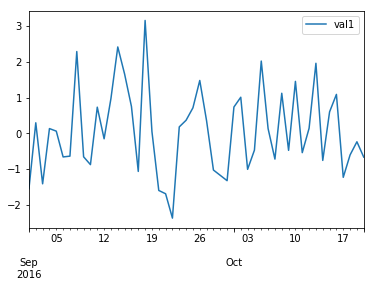

In [46]:
idx1 = pd.date_range('2016-09-01',freq='D',periods=50)
df1 = DataFrame({
    'val1':np.random.randn(50)
},index=idx1)
df1.plot()

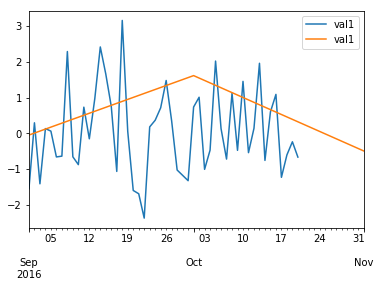

In [48]:
idx2 = pd.date_range('2016-09-01',freq='M',periods=3)
df2 = DataFrame({
    'val1':np.random.randn(3)
},index=idx2)
ax = df1.plot()
df2.plot(ax=ax)

## 时间序列的统计模型

目的：
1. 时间关系调查
2. 预测数据
3. 异动点，变化点的检索

时间序列的注意点
1. 是否存在某个时间点之前的数据影响
2. 是否有季节性规律（淡季、旺季）


## AirPassengers实例

1. 每月搭乘航班人数
2. 单变量、季节性因素分析

In [56]:
df = pd.read_csv('AirPassengers.csv',index_col=0,parse_dates=[0])#载入数据